
#THE SPARKS FOUNDATION
#**TASK 1 - Prediction using Supervised ML**



**To Predict the percentage of marks of the students based on the number of hours they studied**


#Author: Insha Durwesh

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#Importing and reading the data
data = pd.read_csv('http://bit.ly/w-data')
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [3]:
#Checking for null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since we have no null values we proceed with visualsing the data

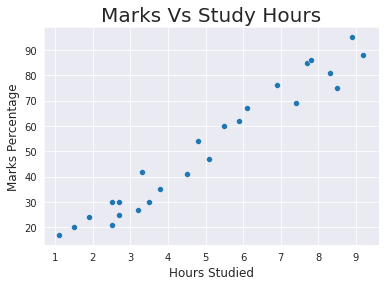

In [5]:
#Visualising the data
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

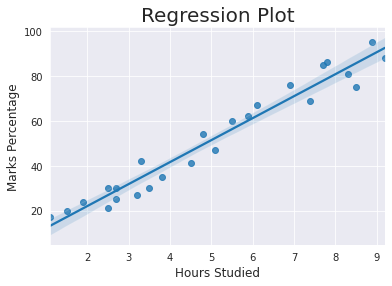

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
#Plotting a regression line
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#Training the Model

1. Splitting the data

In [7]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2. Fitting the Data into the model

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Training complete.")

Training complete.


#Predicting the Percentage of Marks

In [9]:
print(val_X)
pred_y = regression.predict(val_X)  # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [10]:
#Comparing Actual vs Predicted
cs = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
cs

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [11]:
hours = [9.25]
answer = regression.predict([hours])
print('Score is ', answer)


Score is  [93.89272889]


According to the regression model, if a student studies for 9.25 hours daily he/she is likely to score 93.89 marks.

#Evaluating the Model

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Mean absolute error is a model evaluation measure for regression models and the lower value indicates a better fit.